Time: 0
Time: 10
Time: 20
Time: 30
Time: 40
Time: 50
Time: 60
Time: 70
Time: 80
Time: 90
0       9
1    1471
2     325
3       0
4       0
dtype: int64


/Users/connorg0110/Library/Python/3.11/lib/python/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
/Users/connorg0110/Library/Python/3.11/lib/python/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phi, sigma_ar]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1 seconds.
Sampling: [y_obs]


Sampling: [phi, sigma_ar, y_obs]


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
phi       0.333  0.097   0.151    0.518      0.001      0.0   20427.0   
sigma_ar  0.290  0.021   0.252    0.331      0.000      0.0   20566.0   

          ess_tail  r_hat  
phi        14369.0    1.0  
sigma_ar   14657.0    1.0  


/Users/connorg0110/Library/Python/3.11/lib/python/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
/Users/connorg0110/Library/Python/3.11/lib/python/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phi, sigma_ar]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1 seconds.
Sampling: [y_obs]


Sampling: [phi, sigma_ar, y_obs]


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
phi       1.002  0.020   0.963    1.038      0.000    0.000   20210.0   
sigma_ar  3.175  0.226   2.757    3.599      0.002    0.001   20617.0   

          ess_tail  r_hat  
phi        14471.0    1.0  
sigma_ar   14910.0    1.0  


/Users/connorg0110/Library/Python/3.11/lib/python/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
/Users/connorg0110/Library/Python/3.11/lib/python/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phi, sigma_ar]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1 seconds.
Sampling: [y_obs]


Sampling: [phi, sigma_ar, y_obs]


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
phi       0.909  0.043   0.825    0.988      0.000    0.000   20051.0   
sigma_ar  1.844  0.132   1.608    2.099      0.001    0.001   20610.0   

          ess_tail  r_hat  
phi        14017.0    1.0  
sigma_ar   14786.0    1.0  
X1.sum() == 0
X1.sum() == 0


IndexError: list index out of range

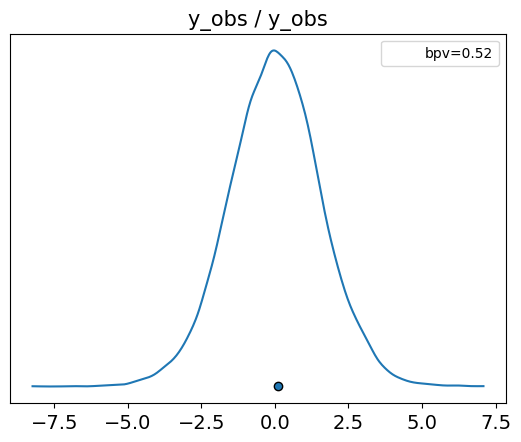

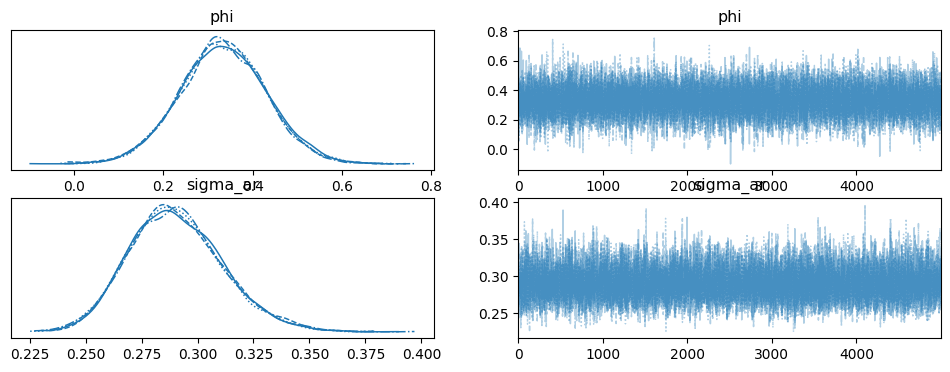

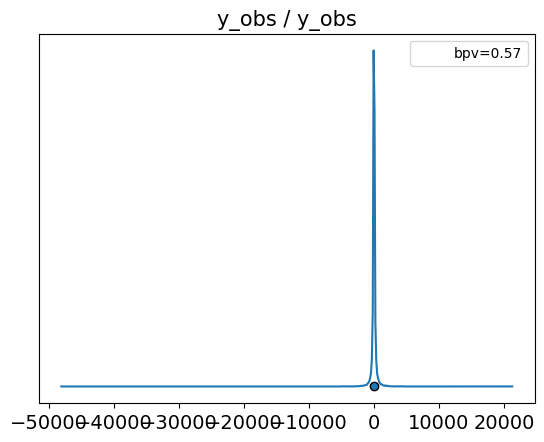

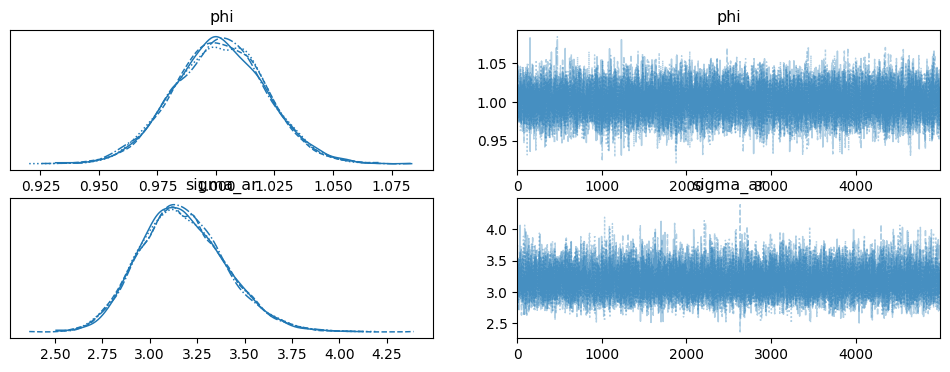

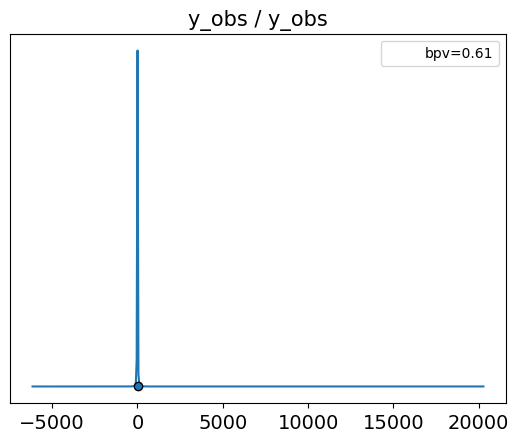

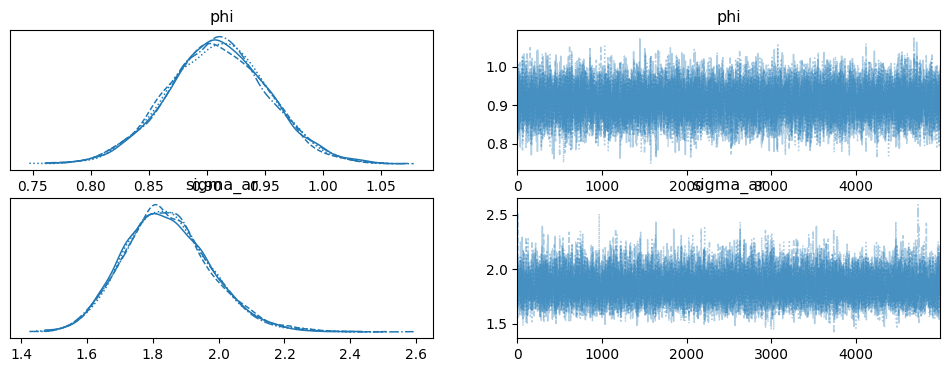

In [69]:
import numpy as np
from scipy import stats
import math
from math import floor
import argparse
import matplotlib.pyplot as plt
import os
import csv
import pymc as pm
import arviz as az
import warnings
import pandas as pd 

class Simulation:

    ## Fixed hyperparameters

    num_timesteps = 100

    initial_users = 20
    initial_groups = 10
    initial_communities = 5

    # group and community preferences
    alpha_group_hyperparameter = 10
    beta_group_hyperparameter = 10 

    alpha_community_hyperparameter = 10
    beta_community_hyperparameter = 10

        
    # Initialize lists to store users and groups
    users = []
    groups = []
    communities = []


    gis = {}
    cis = {}
    uis = {}

    def __init__(self, user_growth_rate, interaction_threshold, new_group_rate, new_community_rate ) -> None:

        self.user_growth_rate = user_growth_rate

        self.interaction_threshold = interaction_threshold

        self.new_group_rate = new_group_rate
        self.new_group_join_chance = new_group_rate / 10

        self.new_community_rate = new_community_rate
        self.new_community_join_chance = new_community_rate / 10

        self.same_community_interaction_ratio = new_community_rate * new_group_rate

    class Community:
        def __init__(self, simulation, group=None):
            self.simulation = simulation 
            # Initialize a community with a list of users and groups
            self.id = len(self.simulation.communities) + 1
            self.groups = [group] if group else []
            self.interactions = []

    class Group:
        def __init__(self, simulation):
            self.simulation = simulation 
            # Initialize a group with an ID and a dictionary tgo track user interactions
            self.id = len(self.simulation.groups) + 1
            self.interactions = {}
            self.community = None

        def join_community(self, community):
            community.groups.append(self)
            self.community = community

    class User:
        def __init__(self, group_alpha, group_beta, community_alpha, community_beta):
            # Initialize a user with ID, group memberships, interaction history, and Beta distribution preferences
            self.id = None

            self.groups = []
            self.communities = []
            self.interaction_history = []

            self.group_preferences = stats.beta(group_alpha, group_beta)
            self.community_preferences = stats.beta(community_alpha, community_beta)
            self.updated_preferences = np.array([1])

        def update_preferences(self):
            # Update user's preferences based on group interactions
            if not self.groups:
                self.updated_preferences = np.array([1])
                return
            else:
                #sort groups by number of interactions
                self.groups.sort(key=lambda group: len(group.interactions))

            total_size = sum([len(group.interactions) for group in self.groups])

            # if size is 0, this must be the first iteration, return uniform
            if total_size == 0:
                self.ccdf = np.array([1])
                return
            else:
                sizes = sorted([len(group.interactions) for group in self.groups])
                self.ccdf = 1 - (np.cumsum(sizes) / total_size)

            group_convolution = np.convolve(self.group_preferences.pdf(np.linspace(0, 1, len(self.groups))), self.ccdf , mode='same')

            self.updated_preferences = np.convolve(group_convolution, self.community_preferences.pdf(np.linspace(0, 1, len(self.groups))), mode='same')

            if np.isnan(self.updated_preferences).any() or np.sum(self.updated_preferences) == 0:
                self.updated_preferences = np.array([1 / len(self.groups)] * len(self.groups))
            else:
                self.updated_preferences /= np.sum(self.updated_preferences)

        def join_group(self, group):
            # Add a group to the user's group list and set initial interactions to 0
            self.groups.append(group)
            group.interactions[self] = 0

        def interact(self, group):
            # Record an interaction with the specified group
            group.interactions[self] = group.interactions.get(self, 0) + 1
            self.interaction_history.append(group.id)

    # Recalculate probabilities at every iteration or after any changes
    def calculate_probabilities(self):
        global community_relative_frequency, group_relative_frequency

        community_relative_frequency = np.array([len(community.groups) for community in self.communities], dtype=float)
        # if community_relative_frequency.sum() != 0:
        community_relative_frequency += 1e-5  # Avoid division by zero
        community_relative_frequency /= community_relative_frequency.sum()

        group_relative_frequency = np.array([sum(group.interactions.values()) for group in self.groups], dtype=float)
        # if group_relative_frequency.sum() != 0:
        group_relative_frequency += 1e-5
        group_relative_frequency /= group_relative_frequency.sum()


    def initialize(self):

        # Initialize users
        for i in range(self.initial_users):
            self.users.append(
                self.User(
                    self.alpha_group_hyperparameter,
                    self.beta_group_hyperparameter,
                    self.alpha_community_hyperparameter,
                    self.beta_community_hyperparameter,
                )
            )
            self.users[-1].id = len(self.users)

        # Initialize communities
        for i in range(self.initial_communities):
            self.communities.append(self.Community(self))

        # Initialize groups
        for i in range(self.initial_groups):
            self.groups.append(self.Group(self))

        # adding the first groups to each community so there is at least one group in each community
        for i in range(len(self.communities)):
            self.groups[i].join_community(self.communities[i])
            # random chance for each user to join the first group of a new community
            for user in self.users:
                if np.random.random() < self.new_community_join_chance:
                    user.join_group(self.groups[i])

        # randomly adding the rest of the groups to communities
        for group in self.groups[len(self.communities):]:
            group.join_community(self.communities[np.random.randint(0, len(self.communities))])
            for user in self.users:
                if np.random.random() < self.new_group_join_chance:
                    user.join_group(group)

        # initialize dictionaries for each group, community, and user
        for group in self.groups:
            self.gis[group.id] = []
        for community in self.communities:
            self.cis[community.id] = []
        for user in self.users:
            self.uis[user.id] = []

        
    def run(self):
        # main loop
        for time in range(self.num_timesteps):
            if time % 10 == 0:
                print(f"Time: {time}")
            # Calculate probabilities
            self.calculate_probabilities()

            # Add new users
            new_users_count = floor(np.random.exponential(self.user_growth_rate))
            for i in range(new_users_count):
                self.users.append(
                    self.User(
                        self.alpha_group_hyperparameter,
                        self.beta_group_hyperparameter,
                        self.alpha_community_hyperparameter,
                        self.beta_community_hyperparameter,
                    )
                )
                self.users[-1].id = len(self.users)

            # Add new groups
            new_groups_count = floor(np.random.exponential(self.new_group_rate))
            for i in range(new_groups_count):
                self.groups.append(self.Group(self))

                # a new community always get made on the first time step
                if time == 0:
                    if new_groups_count == 0:
                        self.groups.append(self.Group(self))
                    self.groups[-1].join_community(self.communities[-1])
                    self.communities[-1].groups.append(self.groups[-1])
                else:
                    # check if the new group forms a new community
                    if np.random.random() < self.new_community_rate:
                        self.communities.append(self.Community(self, self.groups[-1]))
                        self.groups[-1].community = self.communities[-1]
                        # each user has a chance to join the new community
                        for user in self.users:
                            if np.random.random() < self.new_community_join_chance:
                                user.join_group(self.groups[-1])
                        # users[np.random.randint(0, len(users))].join_group(groups[-1])
                    else:
                        # join a random community
                        self.groups[-1].join_community(self.communities[np.random.randint(0, len(self.communities))])

            # Updating dictionaries with new groups, communities, and users
            # and setting their initial values to 0
            for group in self.groups:
                if group.id not in self.gis:
                    self.gis[group.id] = [0]
                self.gis[group.id].append(0)
            for community in self.communities:
                if community.id not in self.cis:
                    self.cis[community.id] = [0]
                self.cis[community.id].append(0)
            for user in self.users:
                if user.id not in self.uis:
                    self.uis[user.id] = [0]
                self.uis[user.id].append(0)

            # Add new users to groups
            for user in self.users:
                self.calculate_probabilities()
                # if there are groups for the user to join that they aren't in
                if len(user.groups) < len(self.groups):
                    # join a group
                    if np.random.random() < self.new_group_join_chance:
                        user.join_group(self.groups[np.random.choice(len(self.groups), p=group_relative_frequency)])

            # Interact with groups
            for user in self.users:
                user.update_preferences()
                interacted_groups = []
                if np.random.uniform() < self.interaction_threshold and user.groups:
                    # print(user.updated_preferences)
                    group = np.random.choice(user.groups, p=user.updated_preferences)
                    user.interact(group)
                    self.gis[group.id][-1] += 1
                    self.cis[group.community.id][-1] += 1
                    self.uis[user.id][-1] += 1

                    # potential bonus interactions within another group in the same community
                    if group.community:
                        while True:
                            if np.random.uniform() < self.same_community_interaction_ratio:
                                community = group.community                    
                                group = np.random.choice(community.groups)
                                user.interact(group)
                                self.gis[group.id][-1] += 1
                                self.cis[group.community.id][-1] += 1
                                self.uis[user.id][-1] += 1
                            else:
                                break

            # Update user preferences
            for user in self.users:
                if user.groups:
                    user.update_preferences()
                    if user.id == 0:
                        print(user.updated_preferences)
                        print(user.group_preferences.pdf(np.linspace(0, 1, len(user.groups))))
                else:
                    user.updated_preferences = np.array([1])

    def plot(self, sim_number):        
        directory_name = f"{self.user_growth_rate}_{self.interaction_threshold}_{self.new_group_rate}_{self.new_community_rate}/{sim_number}"
        os.makedirs(directory_name, exist_ok=True)

        c_sum = []
        c_sum_labels = []
        for i in range(len(self.communities)):
            temp_sum = [0] * self.num_timesteps
            c_vals = np.cumsum(self.cis[i+1])
            # add the values starting from the back
            for j, val in enumerate(reversed(c_vals)):
                temp_sum[-1-j] = val
            c_sum.append(temp_sum)
            c_sum_labels.append(list(self.cis.keys())[i])

        # print the final value for each community
        for c in c_sum_labels[:5]:
            print(c, c_sum[c_sum_labels.index(c)][-1])
            
        # finding the labels for the 5 largest communities
        top_5 = []
        top_5_labels = []
        for i in range(5):
            max_val = 0
            max_index = 0
            for j in range(len(c_sum)):
                if c_sum[j][-1] > max_val and c_sum_labels[j] not in top_5_labels:
                    max_val = c_sum[j][-1]
                    max_index = j
            top_5.append(c_sum[max_index])
            top_5_labels.append(c_sum_labels[max_index])

        for i in range(len(c_sum)):
            if c_sum_labels[i] in top_5_labels:
                plt.plot(c_sum[i][:len(c_sum[i])], label=f"C{i+1}")
            else:
                plt.plot(c_sum[i][:len(c_sum[i])], label=None)

        plt.legend(loc="upper left")
        plt.xlabel("Time")
        plt.ylabel("Cumulative Interactions")
        plt.yscale("log")
        plt.title("Cumulative Interactions of Each Community Over Time")
        plt.savefig(f"{directory_name}/community_interaction_growth.png")
        plt.close()
        
        # Scatter plot for final amount of interactions for each community
        c_sum_final = []
        c_sum_final_labels = []
        for i in range(len(self.communities)):
            c_sum_final.append(c_sum[i][-1])
            c_sum_final_labels.append(list(self.cis.keys())[i])

        plt.scatter(c_sum_final_labels, c_sum_final)
        plt.xlabel("Community")
        plt.ylabel("Final Cumulative Interactions")
        plt.title("Final Cumulative Interactions of Each Community")
        plt.savefig(f"{directory_name}/final_community_interactions.png")
        plt.close()
        

        g_sum = []
        g_sum_labels = []
        for i in range(1, len(self.groups)):
            temp_sum = [0] * self.num_timesteps
            g_vals = np.cumsum(self.gis[i])
            # add the values starting from the back
            for j, val in enumerate(reversed(g_vals)):
                try:
                    temp_sum[j] = val
                except:
                    pass

            temp_sum = temp_sum[::-1]
            g_sum.append(temp_sum)
            g_sum_labels.append(list(self.gis.keys())[i])

        # print the final value for each group
        for g in g_sum_labels[:5]:
            print(g, g_sum[g_sum_labels.index(g)][-1])

        # finding the labels for the 5 largest groups
        top_5 = []
        top_5_labels = []
        for i in range(5):
            max_val = 0
            max_index = 0
            for j in range(len(g_sum)):
                if g_sum[j][-1] > max_val and g_sum_labels[j] not in top_5_labels:
                    max_val = g_sum[j][-1]
                    max_index = j
            top_5.append(g_sum[max_index])
            top_5_labels.append(g_sum_labels[max_index])

        for i in range(len(g_sum)):
            if g_sum_labels[i] in top_5_labels:
                plt.plot(g_sum[i], label=f"G{i+1}")
            else:
                plt.plot(g_sum[i], label=None)

        plt.legend(loc="upper left")
        plt.xlabel("Time")
        plt.ylabel("Cumulative Interactions")
        # plt.yscale("log")
        plt.ylim(bottom=1)
        plt.title("Cumulative Interactions of Each Group Over Time")
        plt.savefig(f"{directory_name}/group_interaction_growth.png")
        plt.close()

        # Scatter plot for final amount of interactions for each group
        g_sum_final = []
        g_sum_final_labels = []
        for i in range(len(g_sum)):
            g_sum_final.append(g_sum[i][-1])
            g_sum_final_labels.append(list(self.gis.keys())[i])

        plt.scatter(g_sum_final_labels, g_sum_final)
        plt.xlabel("Group")
        plt.ylabel("Final Cumulative Interactions")
        plt.title("Final Cumulative Interactions of Each Group")
        plt.savefig(f"{directory_name}/final_group_interactions.png")
        plt.close()

        for u in self.uis:
            self.uis[u] = self.uis[u][:self.num_timesteps]

        # plotting total amount of interactions for each user
        u_sum = []
        u_sum_labels = []
        for i in range(1, len(self.users)):
            temp_sum = [0] * self.num_timesteps
            u_vals = np.cumsum(self.uis[i])
            # add the values starting from the back
            for j, val in enumerate(reversed(u_vals)):
                temp_sum[j] = val

            temp_sum = temp_sum[::-1]
            u_sum.append(temp_sum)
            u_sum_labels.append(list(self.uis.keys())[i])

        # print the final value for each user
        for u in u_sum_labels[:5]:
            print(u, u_sum[u_sum_labels.index(u)][-1])

        # finding the labels for the 5 largest users
        top_5 = []
        top_5_labels = []

        for i in range(5):
            max_val = 0
            max_index = 0
            for j in range(len(u_sum)):
                if u_sum[j][-1] > max_val and u_sum_labels[j] not in top_5_labels:
                    max_val = u_sum[j][-1]
                    max_index = j
            top_5.append(u_sum[max_index])
            top_5_labels.append(u_sum_labels[max_index])

        # Scatter plot for final amount of interactions for each user
        u_sum_final = []
        u_sum_final_labels = []
        for i in range(len(u_sum)):
            u_sum_final.append(u_sum[i][-1])
            u_sum_final_labels.append(list(self.uis.keys())[i])

        plt.scatter(u_sum_final_labels, u_sum_final)
        plt.xlabel("User")
        plt.ylabel("Final Cumulative Interactions")
        plt.title("Cumulative Interactions of Each User")
        plt.savefig(f"{directory_name}/final_user_interactions.png")
        plt.close()

    
    def write_data(self, sim_number):
        directory_name = f"{self.user_growth_rate}_{self.interaction_threshold}_{self.new_group_rate}_{self.new_community_rate}/{sim_number}"
        os.makedirs(directory_name, exist_ok=True)

        # Write User Interactions to CSV
        with open(f"{directory_name}/user_interactions.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            for row in self.uis:
                writer.writerow([row] + self.uis[row])

            file.close()
        
        # Write Group Interactions to CSV
        with open(f"{directory_name}/group_interactions.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            for row in self.gis:
                writer.writerow([row] + self.gis[row])

            file.close()

        # Write Community Interactions to CSV
        with open(f"{directory_name}/community_interactions.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            for row in self.cis:
                writer.writerow([row] + self.cis[row])

            file.close()


        with open(f"{directory_name}/simulation_data.csv", 'w') as file:
            writer = csv.writer(file)
            writer.writerow(['num_users', 'num_groups', 'num_communities', 'num_interactions'])
            writer.writerow([len(self.users), len(self.groups), len(self.communities), sum([len(group.interactions) for group in self.groups])])

            file.close()

        print("Data written to CSV files.")

    def community_regression_model(self):

        y = []
        X = pd.DataFrame()
        g_sum = 0


        for community in range(len(self.communities)):
            df = pd.DataFrame(self.gis[community + 1]) 
            df.fillna(0, inplace=True)
            if len(df)<self.num_timesteps:
                df = df.reindex(range(self.num_timesteps), fill_value=0)
            X[community] = df.squeeze()              

        i = 0
        print(X.sum())
        results = []
        
        for i in range(len(self.communities)):
            
            
            X1 = X[i]
            X1 = X1.T
            y = X1.iloc[-1]
            X1 = X1.iloc[:-1]
            X1 = X1.to_numpy()
            X1.flatten()
            model = pm.Model()
            if(X1.sum() != 0):
                with model:
                    try:
                        # Data
                        X_data = pm.Data('X_data', X1)
                        #y_data = pm.Data('y_data', y)
        
                        # Priors
                        phi = pm.Normal('phi', mu=0, sigma=2,)
                        sigma_ar = pm.Exponential('sigma_ar', lam=1)
                        
        
                        y_obs = pm.AR('y_obs', rho=phi,sigma=sigma_ar,observed = X_data)
        
                        # Sampling
                        trace = pm.sample(tune=1000, draws=5000)
                        posterior_predictive = pm.sample_posterior_predictive(trace)
                        data = posterior_predictive
                        az.plot_bpv(data,kind='t_stat',t_stat='mean',var_names=['y_obs'])
                        az.plot_trace(trace)
                        prior_predictive = pm.sample_prior_predictive()
                        print(az.summary(trace))
                        i= i + 1
                        
                    
                    except pm.exceptions.SamplingError:
                        warnings.warn('SamplingError: Skipping this group')
                prior = prior_predictive['prior_predictive']['y_obs']
                results.append(prior)
                    
            else: 
                print("X1.sum() == 0")
                i = i + 1
                continue


        cs = [[] for _ in range(len(self.communities))]

        for chain in range(prior.shape[0]):
            for draw in range(prior.shape[1]):
                for c in range(prior.shape[2]):
                    cs[c].append(prior[chain,draw,c])

        for c in cs:
            plt.hist(c)
        plt.show()

        pred = posterior_predictive['posterior_predictive']['y_obs'].to_numpy()

        shape = pred.shape
        groups1 = shape[2]

        # Initialize list of lists for each community
        preds = [[] for _ in range(groups1)]

        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(groups1):
                    preds[k].append(pred[i, j, k])

        for k in range(groups1):

            plt.hist(preds[k], bins=50, alpha=0.5)
            plt.axvline(y[k], color='k', linestyle='dashed', linewidth=1)
            plt.title('Community Interaction Predictions')
            plt.xlabel("Number of interactions")
            plt.ylabel("Frequency")
        plt.show()
            
        print(az.summary(trace))

    
    def group_regression_model(self):

        y = []
        X = pd.DataFrame()
        g_sum = 0


        for group in range(len(self.groups)):
            df = pd.DataFrame(self.gis[group + 1]) 
            df.fillna(0, inplace=True)
            if len(df)<self.num_timesteps:
                df = df.reindex(range(self.num_timesteps), fill_value=0)
            X[group] = df.squeeze()            

        # get rid of third dimension of X\
            
        #print(X.sum().idxmax())
        #print(X[X.sum().idxmax()])
        
        #X =  X[X.sum().idxmax()]
        X = np.array(X)
            
        X = pd.DataFrame(X)

        i = 0
        print(X.sum())
        results = []

        for i in range(len(self.groups)):
            
            
            X1 = X[i]
            X1 = X1.T
            y = X1.iloc[-1]
            X1 = X1.iloc[:-1]
            X1 = X1.to_numpy()
            X1.flatten()
            model = pm.Model()
            if(X1.sum() != 0):
                with model:
                    try:
                        # Data
                        X_data = pm.Data('X_data', X1)
                        #y_data = pm.Data('y_data', y)
        
                        # Priors
                        phi = pm.Normal('phi', mu=0, sigma=2,)
                        sigma_ar = pm.Exponential('sigma_ar', lam=1)
                        
        
                        y_obs = pm.AR('y_obs', rho=phi,sigma=sigma_ar,observed = X_data)
        
                        # Sampling
                        trace = pm.sample(tune=1000, draws=1000)
                        posterior_predictive = pm.sample_posterior_predictive(trace)
                        data = posterior_predictive
                        az.plot_bpv(data,kind='t_stat',t_stat='mean',var_names=['phi'])
                        prior_predictive = pm.sample_prior_predictive()
                        print(az.summary(trace))
                        az.plot_trace(trace)
                        plt.show()
                        i= i + 1
                        
                    
                    except pm.exceptions.SamplingError:
                        warnings.warn('SamplingError: Skipping this group')
                prior = prior_predictive['prior_predictive']['y_obs']
                results.append(prior)
                    
            else: 
                print("X1.sum() == 0")
                i = i + 1
                continue

        #prior = prior_predictive['prior_predictive']['y_obs']
        print("ALl MODELS DONE")
        print(results[0])
        gs = [[] for _ in range(len(self.groups))]

        for chain in range(prior.shape[0]):
            for draw in range(prior.shape[1]):
                for g in range(prior.shape[2]):
                    gs[g].append(prior[chain,draw,g])

        for g in gs:
            plt.hist(g)
        plt.show()

        pred = posterior_predictive['posterior_predictive']['y_obs'].to_numpy()

        shape = pred.shape
        groups1 = shape[2]

        # Initialize list of lists for each community
        preds = [[] for _ in range(groups1)]

        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(groups1):
                    preds[k].append(pred[i, j, k])
        """
        for k in range(groups1):

            plt.hist(preds[k], bins=50, alpha=0.5)
            plt.axvline(y[k], color='k', linestyle='dashed', linewidth=1)
            plt.title('Group Interaction Predictions')
            plt.xlabel("Number of interactions")
            plt.ylabel("Frequency")
        plt.show()
        """
            
        #print(az.summary(trace))
        
        
#sim = Simulation(1, 0.2, .2, 0.25)
sim = Simulation(1, 0.7, .2, 0.25)
sim.initialize()
sim.run()
sim.community_regression_model()
#sim.group_regression_model()




[]


In [11]:

# multinomial logit model for group interactions
num_groups = len(groups)
y = []
X = []

for user in users:
    y.append(user.interaction_history[-1])
    # every interaction but the last one
    X.append(np.bincount(user.interaction_history[:-1], minlength=num_groups))


X = pd.DataFrame(X)
X.fillna(0, inplace=True)

y = pd.DataFrame(y)
y = y.iloc[:,0]

# drop first column if sum is 0
if X.iloc[:,0].sum() == 0:
    X = X.iloc[:,1:]
    if num_groups != X.shape[1]:
        num_groups -= (X.shape[1] - num_groups)

for row in range(len(X)):
    X.iloc[row] = X.iloc[row] / X.iloc[row].sum()

X.fillna(0, inplace=True)
X = (X - X.mean()) / X.std()
X.fillna(0, inplace=True)


model = pm.Model()


with model:
    try:

        indices = pm.Data('index', list(range(len(X))), dims='user')
        # Define your data within the model
        X_data = pm.Data('X_data', X)
        y_data = pm.Data('y_data', y)

        # Model parameters
        
        alpha = pm.Exponential('alpha', lam=np.max(group_relative_frequency), shape=num_groups)

        beta_mu = pm.Normal('beta_mu', mu=1, sigma=10, shape=num_groups)
        beta_sd = pm.TruncatedNormal('beta_sd', lower=0, mu=5, sigma=2.5, shape=num_groups)

        beta = pm.Normal('beta', mu=beta_mu, sigma=beta_sd, shape=(num_groups, num_groups))

        # Computing mu
        mu = alpha + pm.math.dot(X_data, beta) 

        # A numerically stable softmax
        mu_max = pm.math.max(mu, axis=1, keepdims=True)
        p = pm.Deterministic('p', pm.math.exp(mu - mu_max) / pm.math.sum(pm.math.exp(mu - mu_max), axis=1, keepdims=True))

        # Categorical distribution for observed data
        y_obs = pm.Categorical('y_obs', p=p, observed=y_data, dims='user')

        # Sampling
        trace = pm.sample(tune=5000, draws=5000)
        posterior_predictive = pm.sample_posterior_predictive(trace)
        prior_predictive = pm.sample_prior_predictive()

    except pm.exceptions.SamplingError:
        model.debug(verbose=True)


NameError: name 'groups' is not defined

In [ ]:

print(az.summary(trace))

y_pred = np.rint(posterior_predictive['posterior_predictive']['y_obs'].mean(axis=(0,1))) 

plt.scatter(y, y_pred)
plt.xlabel('Actual Group ID')
plt.ylabel('Predicted Group ID')
plt.show()

plt.scatter(y, y_pred - y)
plt.xlabel('Actual Group ID')
plt.ylabel('Residual')
plt.show()

print(az.summary(trace))

plt.hist(y_pred, bins=num_groups, alpha=0.5, label='Predicted')
plt.hist(y,  bins=num_groups, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.xlabel("Group ID")
plt.ylabel("Frequency")
plt.show()
samples = posterior_predictive['posterior_predictive']['y_obs'].to_numpy()
users = [[] for _ in range(samples.shape[2])]
for chain in range(samples.shape[0]):
  for draw in range(samples.shape[1]):
    for user in range(samples.shape[2]):
      users[user].append(samples[chain, draw, user])


# Define the grid layout
num_users = len(users)
num_rows = int(num_users**0.5)  # Number of rows in the grid
num_cols = (num_users + num_rows - 1) // num_rows  # Number of columns in the grid

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate through users and plot histograms
for user_idx, ax in enumerate(axes.flat):
    if user_idx < num_users:
        user_data = users[user_idx]
        actual_interaction = y[user_idx]

        ax.hist(user_data, bins=num_groups)
        ax.axvline(actual_interaction, color='r', linestyle='dashed', linewidth=1)

        ax.set_title(f'User {user_idx + 1}')
        ax.set_xlabel('Interactions')
        ax.set_ylabel('Frequency')

# Remove any empty subplots
for user_idx in range(num_users, num_rows * num_cols):
    fig.delaxes(axes.flat[user_idx])

plt.tight_layout()
plt.show()